<a href="https://colab.research.google.com/github/srita2003/ML_Practicals/blob/main/Bonus_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
df = pd.read_csv("USA_Housing.csv")

In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
# Handle missing values
df.isnull().sum()

,0
Avg. Area Income,0
Avg. Area House Age,0
Avg. Area Number of Rooms,0
Avg. Area Number of Bedrooms,0
Area Population,0
Price,0
Address,0


In [8]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [11]:
# Standardizing the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Experimenting with different k values
k_values = [3, 5, 7, 9, 11]
knn_mae, knn_mse, knn_rmse = [], [], []

In [14]:
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_knn = knn.predict(X_test_scaled)
    mae, mse, rmse = evaluate_model(y_test, y_pred_knn)
    knn_mae.append(mae)
    knn_mse.append(mse)
    knn_rmse.append(rmse)

In [15]:
# Train Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lr = lin_reg.predict(X_test_scaled)
lin_mae, lin_mse, lin_rmse = evaluate_model(y_test, y_pred_lr)

In [16]:
# Print Performance Metrics
print("Linear Regression Performance:")
print(f"MAE: {lin_mae:.2f}, MSE: {lin_mse:.2f}, RMSE: {lin_rmse:.2f}\n")

Linear Regression Performance:
MAE: 82288.22, MSE: 10460958907.21, RMSE: 102278.83



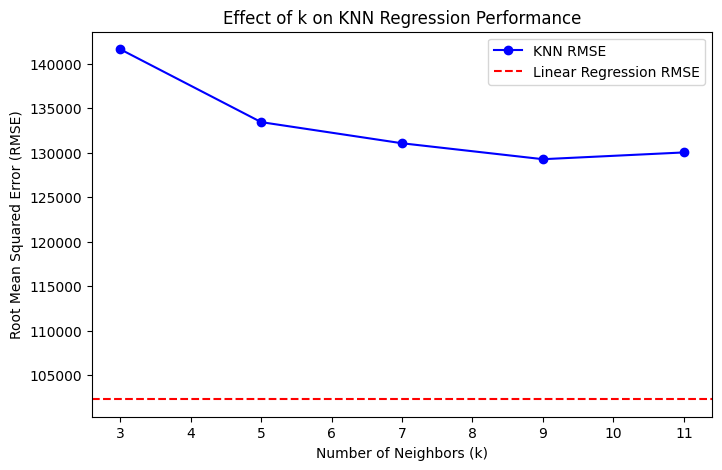

In [19]:
# Plot the impact of k on RMSE
plt.figure(figsize=(8, 5))
plt.plot(k_values, knn_rmse, marker='o', linestyle='-', color='b', label='KNN RMSE')
plt.axhline(y=lin_rmse, color='r', linestyle='--', label='Linear Regression RMSE')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Effect of k on KNN Regression Performance")
plt.legend()
plt.show()